## **Hands-on 15**

### **Goal**: 
You are the data scientist assigned to perform the data pre-processing and preparing the data for Machine Learning algorithms. 

1. perform data exploration to understand the data (2.5 points)
2. prepare the test and training sets. (2.5 points)
3. pre-processing of the data, including fixing all the missing values (set the missing values to median values) and any other ones that you think are appropriate to perform. Build a pipeline to perform data transformation. (5 points)

In the next hands-on, we will use 14 out of 15 attributes as pedictors describe below to predict if income goes above or below \$50K/yr based on census data. `Income` will be the label. 

### Data: 
An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

### Fields:
The dataset contains 15 columns

#### Target field: Income
- The income is divide into two classes: 50K

#### Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information

- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- `salary`: >50K,<=50K

Note: "?" is used to represent missing data in this dataset.

In [50]:
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reads in the data from the csv file.
adults = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/adult.csv'
df = pd.read_csv(adults, na_values=['?'])
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [51]:
# If income is '<=50K', it is represented as 0; otherwise, it is represented as 1.
def convert_income(income):
  if income == '<=50K':
    return 0
  else:
    return 1

df['income'] = df.income.map(convert_income)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


## Hands-on 15 Part 1: Data Exploration (2.5 points)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [53]:
# Since only categorical columns have missing values, I cannot set the missing values to median values.
# Drops rows with missing values.
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.5+ MB


In [54]:
# Sees how many people belong to each workclass.
df["workclass"].value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

In [55]:
# Sees how many people belong to each education.
df["education"].value_counts()

HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64

In [56]:
# Sees how many people belong to each marital status.
df["marital-status"].value_counts()

Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64

In [57]:
# Sees how many people belong to each occupation.
df["occupation"].value_counts()

Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: occupation, dtype: int64

In [58]:
# Sees how many people belong to each relationship.
df["relationship"].value_counts()

Husband           18666
Not-in-family     11702
Own-child          6626
Unmarried          4788
Wife               2091
Other-relative     1349
Name: relationship, dtype: int64

In [59]:
# Sees how many people belong to each race.
df["race"].value_counts()

White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64

In [60]:
# Sees how many people belong to each gender.
df["gender"].value_counts()

Male      30527
Female    14695
Name: gender, dtype: int64

In [61]:
# Sees how many people belong to each native country.
df["native-country"].value_counts()

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [62]:
# Shows a summary of the numerical attributes.
df.drop('income', axis=1).describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


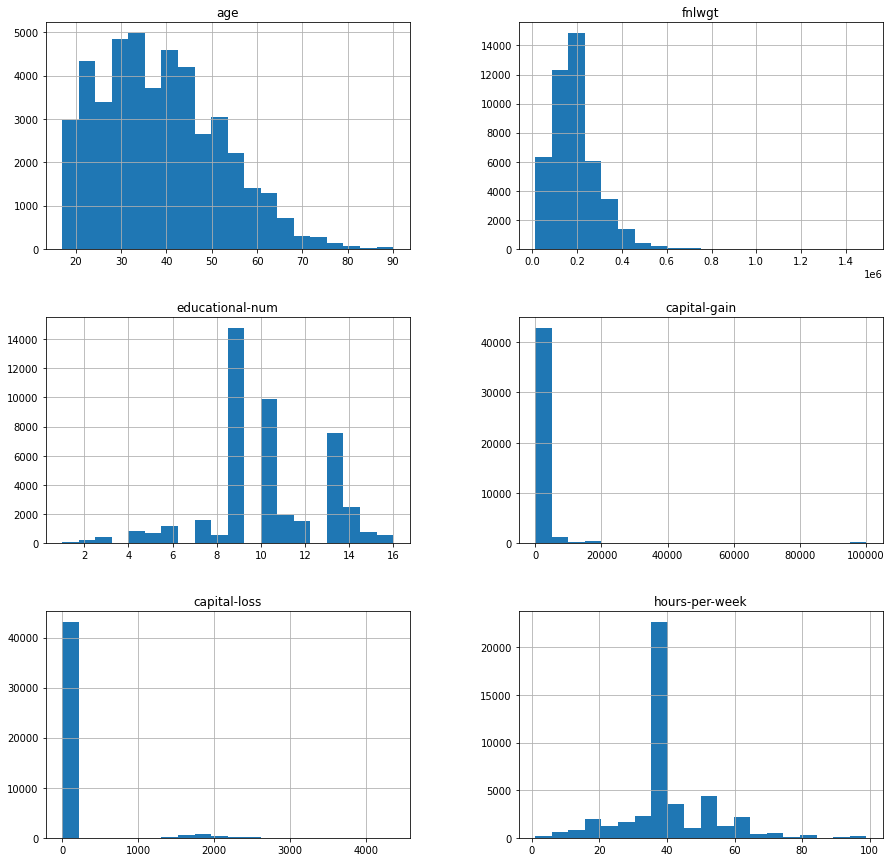

In [63]:
# Plots a histogram for each numerical attribute.
df.drop('income', axis=1).hist(bins=20, figsize=(15,15))
plt.show()

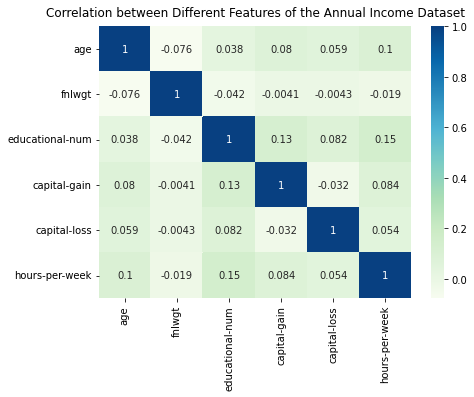

In [64]:
# Creates a correlation matrix.
plt.figure(figsize=(7,5))
df_corr = df.drop('income', axis=1).corr()
sns.heatmap(data=df_corr, annot=True, cmap="GnBu")
plt.title("Correlation between Different Features of the Annual Income Dataset", pad=10);

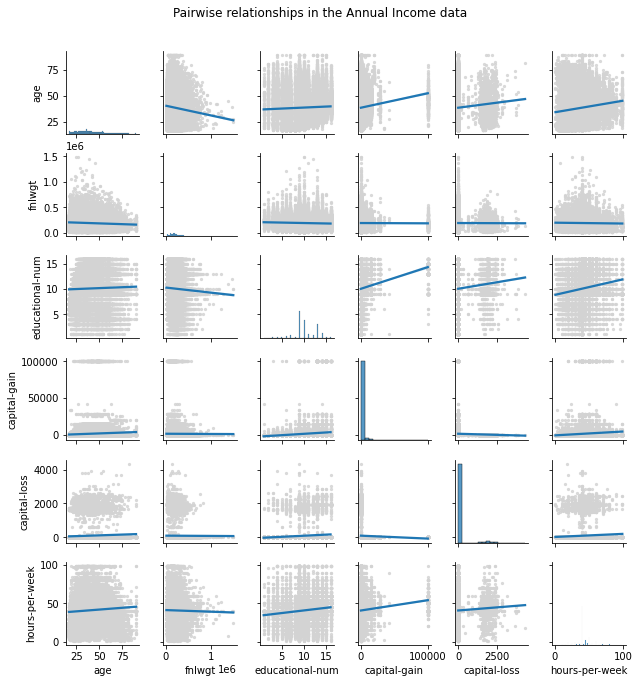

In [65]:
# Creates a pairwise linear regression plot.
g=sns.pairplot(
    data=df.drop(['workclass','education','marital-status','occupation','relationship','race', 'gender', 'native-country', 'income'], axis=1),
    kind="reg",
    plot_kws={"scatter_kws":{"color":"lightgrey", "s":5}, "order":1},
    height=1.5)
g.fig.suptitle("Pairwise relationships in the Annual Income data", y=1.05);

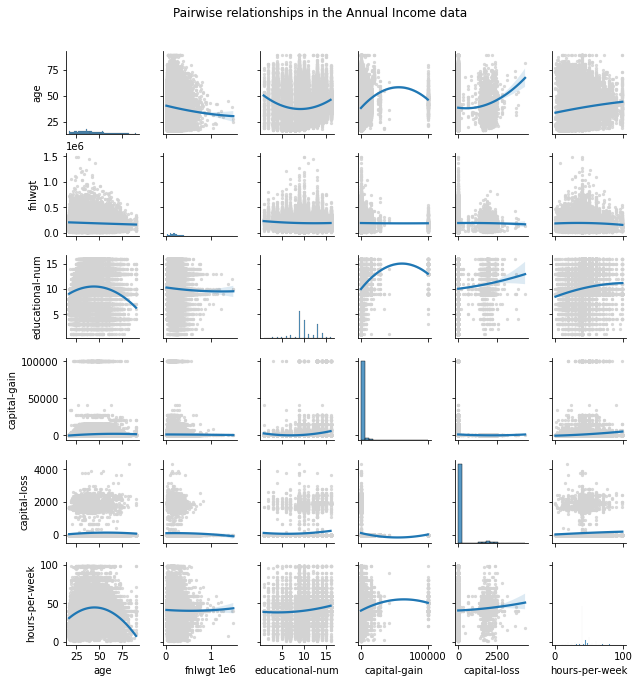

In [66]:
# Creates a pairwise polynomial regression plot.
g=sns.pairplot(
    data=df.drop(['workclass','education','marital-status','occupation','relationship','race', 'gender', 'native-country', 'income'], axis=1),
    kind="reg",
    plot_kws={"scatter_kws":{"color":"lightgrey", "s":5}, "order":2},
    height=1.5)
g.fig.suptitle("Pairwise relationships in the Annual Income data", y=1.05);

## Hands-on 15 Part 2: Prepare Training & Testing data sets (2.5 points)

In [67]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42, stratify=df['income'])

## Hands-on 15 Part 3: Pre-processing data (5 points)

In [68]:
# Separates the predictors and the labels.
df = train_set.drop('income', axis=1)
df_labels = train_set['income'].copy()

In [69]:
# Gets the numerical columns.
df_num = df.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'], axis=1)
df_num.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
12660,35,61343,9,0,0,40
24287,19,127190,9,0,0,15
19245,27,193701,9,0,0,45
24602,51,153870,10,0,2603,40
28665,29,192010,13,0,0,60


In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Feature scaling pipeline for numerical attributes.
num_pipeline = Pipeline([('std_scaler', StandardScaler())])
df_num_tr = num_pipeline.fit_transform(df_num)
df_num_tr

array([[-0.26789621, -1.21855259, -0.43615486, -0.14779435, -0.21816142,
        -0.08191546],
       [-1.47640119, -0.59525424, -0.43615486, -0.14779435, -0.21816142,
        -2.15786223],
       [-0.8721487 ,  0.03432943, -0.43615486, -0.14779435, -0.21816142,
         0.3332739 ],
       ...,
       [ 0.26082472, -0.12085384,  1.90323196, -0.14779435, -0.21816142,
         1.99403131],
       [-1.17427495, -0.14824803,  1.12343636, -0.14779435, -0.21816142,
        -0.08191546],
       [-1.47640119,  1.50310875, -0.43615486, -0.14779435, -0.21816142,
        -2.15786223]])

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(df_num)
cat_attribs = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

# Transformer to apply all transformations to the annual income data, also including one-hot encoding for categorical attributes.
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

df_prepared = full_pipeline.fit_transform(df)

In [72]:
df_prepared = df_prepared.toarray()
df_prepared

array([[-0.26789621, -1.21855259, -0.43615486, ...,  1.        ,
         0.        ,  0.        ],
       [-1.47640119, -0.59525424, -0.43615486, ...,  1.        ,
         0.        ,  0.        ],
       [-0.8721487 ,  0.03432943, -0.43615486, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.26082472, -0.12085384,  1.90323196, ...,  1.        ,
         0.        ,  0.        ],
       [-1.17427495, -0.14824803,  1.12343636, ...,  1.        ,
         0.        ,  0.        ],
       [-1.47640119,  1.50310875, -0.43615486, ...,  1.        ,
         0.        ,  0.        ]])

## **Hands-on 16**
Use the results from Hands-on 15 for the following steps:

1. Select ML Models and perform 10-fold Cross Validation. (5 points)
2. Pick the best model from step 1 and perform fine-tuning. (2.5 points)
3. Test ML model with the test set. (2.5 points)
4. Bonus: Create a plot with ROC curves to compare the performance of the ML models that you have trained using different ML classifiers. (2 points)

## Hands-on 16 Part 1: Select ML Models, perform 10-fold Cross Validation (5 points)
Try four different ML models for classification. 

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [74]:
def display_scores(scores):
  print("Cross-validation scores:", scores)
  print("Mean cross-validation accuracy:", scores.mean())

In [75]:
# Logistic Regression.
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(df_prepared, df_labels)

scores = cross_val_score(log_reg, df_prepared, df_labels, scoring='accuracy', cv=10)
display_scores(scores)

Cross-validation scores: [0.84051962 0.83803206 0.85406302 0.85710337 0.84770591 0.84273079
 0.85931454 0.85844623 0.84130495 0.84932264]
Mean cross-validation accuracy: 0.8488543138147617


In [76]:
# Support Vector Classifier.
svc = SVC(random_state=42, max_iter=1000)
svc.fit(df_prepared, df_labels)

scores = cross_val_score(svc, df_prepared, df_labels, scoring='accuracy', cv=10)
display_scores(scores)

Cross-validation scores: [0.58761747 0.46600332 0.75704809 0.68352681 0.65229409 0.72305141
 0.71088999 0.54465026 0.69919823 0.70998065]
Mean cross-validation accuracy: 0.6534260317617516


In [77]:
# Decision Tree Classifier.
tree_class = DecisionTreeClassifier(random_state=42)
tree_class.fit(df_prepared, df_labels)

scores = cross_val_score(tree_class, df_prepared, df_labels, scoring='accuracy', cv=10)
display_scores(scores)

Cross-validation scores: [0.81785517 0.80569375 0.81288004 0.81619679 0.81094527 0.81260365
 0.81426202 0.81199889 0.81255184 0.81669892]
Mean cross-validation accuracy: 0.8131686359771809


In [78]:
# Random Forest Classifier.
forest_class = RandomForestClassifier(random_state=42)
forest_class.fit(df_prepared, df_labels)

scores = cross_val_score(forest_class, df_prepared, df_labels, scoring='accuracy', cv=10)
display_scores(scores)

Cross-validation scores: [0.85157546 0.84383637 0.84991708 0.85737977 0.83913765 0.842178
 0.86263129 0.86093448 0.84406967 0.85291678]
Mean cross-validation accuracy: 0.8504576539781356


## Hands-on 16 Part 2: Pick the best model from Part 1 and perform fine-tuning (2.5 points)

In [79]:
# The model that performed the best with the highest mean cross-validation accuracy was Random Forest Classifier.
# Uses GridSearchCV to perform hyperparameter tuning.
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [5, 10, 25, 50, 100, 200, 500], 'criterion': ['gini', 'entropy', 'log_loss']}
forest_class = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(forest_class, params, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(df_prepared, df_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [5, 10, 25, 50, 100, 200, 500]},
             return_train_score=True, scoring='accuracy')

In [80]:
# Best combination of hyperparameters for Random Forest Classifier.
grid_search.best_params_

{'criterion': 'gini', 'n_estimators': 200}

In [81]:
# Training accuracy of the best Random Forest Classifier.
grid_search.best_estimator_.score(df_prepared, df_labels)

0.9998617906404622

## Test ML model with the test set (2.5 points)
Use the fine-tuned model and evaluate its performance using the test set that you have created in Hands-on 15. 

In [82]:
from sklearn.metrics import accuracy_score

final_model = grid_search.best_estimator_

X_test = test_set.drop("income", axis=1)
Y_test = test_set["income"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

test_accuracy = accuracy_score(Y_test, final_predictions)
print(test_accuracy)

0.8455500276395799


## Bonus: Plot the ROC curve to compare the performace of the ML classifiers (1  point)

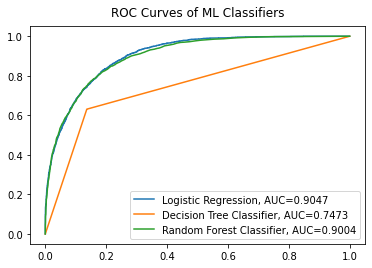

In [83]:
# Code taken from: https://www.statology.org/plot-multiple-roc-curves-python/ 

from sklearn import metrics 

plt.figure(0).clf()

Y_pred = log_reg.predict_proba(X_test_prepared)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred)
auc = round(metrics.roc_auc_score(Y_test, Y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

Y_pred = tree_class.predict_proba(X_test_prepared)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred)
auc = round(metrics.roc_auc_score(Y_test, Y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree Classifier, AUC="+str(auc))

Y_pred = final_model.predict_proba(X_test_prepared)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred)
auc = round(metrics.roc_auc_score(Y_test, Y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest Classifier, AUC="+str(auc))

plt.title('ROC Curves of ML Classifiers', pad=10)
plt.legend();

## Bonus: Evaluating the model using the Confusion Matrix and a Precision-Recall Curve (1 point)
A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier. It can be used to evaluate the performance of a classification model through the calculation of performance metrics such as [accuracy, precision, recall, and F1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html). Here is [an article](https://medium.com/swlh/explaining-accuracy-precision-recall-and-f1-score-f29d370caaa8) that gives a good explaination of Precision, Recall, and F1-score.

### Accuracy 

Accuracy = $\frac{True\ Positives\ +\ True\ Negatives}{All\ Samples}$

### Precision (aka Specificity)

Precision = $\frac{True\ Positives}{True\ Positives\ +\ False\ Positives}$
= $\frac{True\ Positives}{Total\ Predicted\ Positives}$


### Recall (aka Sensitivity)

Recall = $\frac{True\ Positives}{True\ Positives\ +\ False\ Negatives}$
= $\frac{True\ Positives}{Total\ Actual\ Positives}$

### F1-score (combining Precision and Recall)

F1-score = $\frac{2\ ×\ (Precision\ ×\ Recall)}{Precision\ +\ Recall}$

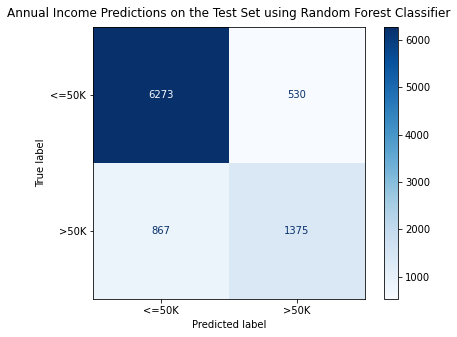

In [84]:
# Code taken from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(7,5))
disp = plot_confusion_matrix(final_model, X_test_prepared, Y_test, xticks_rotation='horizontal', display_labels=['<=50K', '>50K'], cmap=plt.cm.Blues, normalize=None, ax=ax)
disp.ax_.set_title('Annual Income Predictions on the Test Set using Random Forest Classifier', pad=10)
plt.show()

## Precision-Recall Curve 
[Precision-Recall Curve documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py)


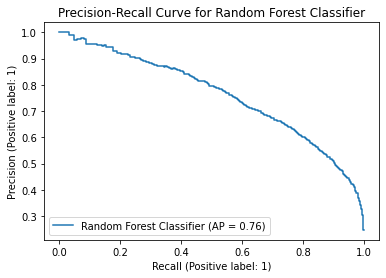

In [85]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(final_model, X_test_prepared, Y_test, name="Random Forest Classifier")
display.ax_.set_title("Precision-Recall Curve for Random Forest Classifier");